# Итоговое задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

### Описание датасета
Посмотрим на переменные, которые содержит датасет:
1. *`school`* — аббревиатура школы, в которой учится ученик
2. *`sex`* — пол ученика ('F' - женский, 'M' - мужской)
3. *`age`* — возраст ученика (от 15 до 22)
4. *`address`* — тип адреса ученика ('U' - городской, 'R' - за городом)
5. *`famsize`* — размер семьи('LE3' <= 3, 'GT3' >3)
6. *`Pstatus`* — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. *`Medu`* — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. *`Fedu`* — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. *`Mjob`* — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. *`Fjob`* — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. *`reason`* — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. *`guardian`* — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. *`traveltime`* — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. *`studytime`* — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. *`failures`* — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. *`schoolsup`* — дополнительная образовательная поддержка (yes или no)
17. *`famsup`* — семейная образовательная поддержка (yes или no)
18. *`paid`* — дополнительные платные занятия по математике (yes или no)
19. *`activities`* — дополнительные внеучебные занятия (yes или no)
20. *`nursery`* — посещал детский сад (yes или no)
21. *`higher`* — хочет получить высшее образование (yes или no)
22. *`internet`* — наличие интернета дома (yes или no)
23. *`romantic`* — в романтических отношениях (yes или no)
24. *`famrel`* — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. *`freetime`* — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. *`goout`* — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. *`health`* — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. *`absences`* — количество пропущенных занятий
29. *`score`* — баллы по госэкзамену по математике

### `Рекомендации по выполнению проекта`
1. Проведите ***первичную обработку*** данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на ***распределение признака*** для числовых переменных, устраните выбросы.
3. Оцените количество ***уникальных значений*** для номинативных переменных.
4. По необходимости ***преобразуйте*** данные
5. Проведите ***корреляционный анализ*** количественных переменных
6. Отберите ***не коррелирующие*** переменные.
7. Проанализируйте номинативные переменные и устраните те, которые ***не влияют*** на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте ***сформулировать выводы*** относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.
---

## Подготовка к работе
***Импорт библиотек и чтение файла***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

##### Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

1. Строковых - 17
2. Числовых - 13

***Здесь будут вспомогательные функции, которые будут использованы далее***

In [3]:
def display_info(x, x_col):
    display(pd.DataFrame(x.value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:", (x.value_counts()>10).sum())
    print("Уникальных значений:", x.nunique())
    students.loc[:, [x_col]].info()
    
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
# подведение статистики по верхним и нижним границам, вычисление квартилей
def stat_column(column: pd.Series):
    perc25 = column.quantile(0.25)
    perc75 = column.quantile(0.75)
    IQR = perc75 - perc25
    bottom_bound = perc25 - 1.5*IQR
    top_bound = perc75 + 1.5*IQR
#     count_lower = column[column < bottom_bound].value_counts()
#     count_upper = column[column > top_bound].value_counts()
    print(f'25-й перцентиль: {perc25}\n',
         f'75-й перцентиль: {perc75}\n',
         f'IQR: {IQR}\n',
         f'Границы выбросов: [{bottom_bound}, {top_bound}]\n')
#          f'Количество выбросов ниже и выше границ: [{count_lower}, {count_upper}]')

# Замена NaN на None
def NaN_to_None(column):
    column = column.astype(str).apply(lambda x: None if (x.strip() == '')or(x.strip() == 'NaN') else x)

## Рассмотрим столбцы

Заранее определим на будущее ряд правил:
1. Если в столбце пустых значений менее 5%, то заменяем занные значения на:
    * Моду, если тип строковый
    * Медиану, если тип числовой
2. Если выбросов менее 1%, то ими можно пренебречь

#### SCHOOL

In [4]:
students.school.value_counts(dropna = False, normalize = True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

In [5]:
display_info(students.school, 'school')

,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


1. *Не имеет пропусков*
2. *Большинство учеников (88%) из школы GP*
3. *Чисто информативная колонка, отфильтровать не получится*

#### SEX

In [6]:
students.sex.value_counts(dropna = False, normalize = True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

In [7]:
display_info(students.sex, 'sex')

,sex
F,208
M,187


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


1. *Не имеет пропусков*
2. *Мужчин чуть менее половины (47%)*
3. *Не фильтруем*

#### AGE

In [8]:
students.age.value_counts(dropna = False, normalize = True)

16    0.263291
17    0.248101
15    0.207595
18    0.207595
19    0.060759
20    0.007595
21    0.002532
22    0.002532
Name: age, dtype: float64

In [9]:
display_info(students.age, 'age')

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [10]:
stat_column(students.age)

25-й перцентиль: 16.0
 75-й перцентиль: 18.0
 IQR: 2.0
 Границы выбросов: [13.0, 21.0]



count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

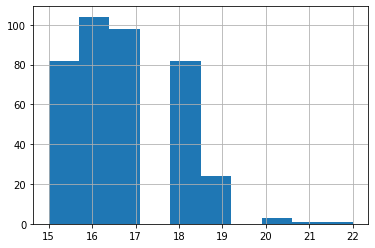

In [11]:
students.age.hist()
students.age.describe()

*По результатам видно, что есть выброс. Так как выброс всего один, то его значением можно пренебречь*

In [12]:
students = students[students.age <= 21]

students.age.describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

#### ADDRESS

In [21]:
students.address.value_counts(dropna = False, normalize = True)

U      0.746193
R      0.210660
NaN    0.043147
Name: address, dtype: float64

In [14]:
students.address.describe()

count     377
unique      2
top         U
freq      294
Name: address, dtype: object

In [15]:
display_info(students.address, 'address')

,address
U,294
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


1. Не удивительно, что большинство учащихся живут в городе
2. Есть пустые значения. Хорошо, когда человек стремится к знаниям не смотря на отсутствие места проживания!
3. Пустых значений не так мало, чтобы ими можно было пренебречь. Заменим пустые значения на Моду

In [22]:
# NaN_to_None(students.address)
students.address = students.address.apply(lambda x: 'U' if pd.isnull(x) else 'U' if x == 'nan' else x)

display_info(students.address, 'address')
students.address.value_counts(dropna = False)

,address
U,311
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


U    311
R     83
Name: address, dtype: int64

#### FAMSIZE

In [23]:
students.famsize.value_counts(dropna = False, normalize = True)

GT3    0.659898
LE3    0.271574
NaN    0.068528
Name: famsize, dtype: float64

In [24]:
display_info(students.famsize, 'famsize')

,famsize
GT3,260
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  367 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


1. Присутствуют пустые значения, 